<img src='./Data/alura.png'>
<h1 style="color:blue; font-size:35px; text-align:center;">Projeto para a 2ª Imersão IA Alura</h1>
<h5>Desenvolvido por: Isabella Cristina Arving</h5>
<h1 style="color:blue; font-size:35px;">Utilizando a API do Gemini para catalogar em um dataset pandas, o conteúdo de uma prateleira de CDS.</h1>
<p>Desde muito nova, sempre fui apaixonada por música. Comecei a colecionar cds, fitas k7 e discos de vinil a alguns anos, e conto com uma coleção relativamente grande de mídias físicas. A minha idéia, como estudante de análise e ciência de dados, é criar um dataset com o meu acervo e gerar estatísticas sobre os dados, por exemplo, qual o gênero de música que eu mais possuo cds, quais as décadas de lançamento desses álbuns. Para isso resolvi desenvolver um programa utilizando a Inteligência Artificial do Google, a Gemini, para a partir de uma foto de alguns dos meus CDS, gerar todas as informações relevantes sobre eles, e retornar uma tabela com as informações: Nome do artista, Nome do Álbum, gênero(s), data de lançamento do álbum, número de faixas.<br>
Os modelos do Gemini utilizados nesse projeto foram: 
    <ul>
        <li>gemini-pro-vision</li>
        <li>gemini-1.5-pro-latest</li>
    </ul>
</p>

In [3]:
#Instalar a biblioteca
#!pip install -U  -q google-generativeai

In [5]:
#imports
import google.generativeai as genai
from PIL import Image
import pandas as pd

<h1 style="color:blue; font-size:35px;">API - KEY: Crie sua API KEY no <a href="http://bit.ly/49NYCHv">link</a></h1>

In [8]:
# Cole sua API KEY aqui:
API_KEY = "SUA_API_KEY"
# Ativando a biblioteca com a api_key:
genai.configure(api_key=API_KEY)

<h1 style="color:blue; font-size:35px;">Funções: </h1>

In [14]:
# Carrega imagem através do path dela no seu computador, para utilizar no modelo generativo:
def carrega_imagem(path_imagem):
    img = Image.open(path_imagem)
    return img

# utiliza o modelo generativo gemini-pro-vision para interagir com um texto e imagem
def pro_vision_genai(imagem, texto):
    generation_config = {
        "candidate_count" : 1, # somente a primeira resposta 
        "temperature" : 0, # não quero criatividade na resposta, e sim precisão
    }

    safety_settings = {
        "HARASSMENT" : "BLOCK_NONE", 
        "HATE" : "BLOCK_NONE",
        "SEXUAL" : "BLOCK_NONE",
        "DANGEROUS" : "BLOCK_NONE",
    }
    model = genai.GenerativeModel('gemini-pro-vision',
                              safety_settings=safety_settings, generation_config=generation_config)
    response = model.generate_content([imagem, texto])
    return response.text

# utiliza o modelo generativo gemini-1.5-pro-latest para interagir com um texto
def pro_genai(texto):
    model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")
    response = model.generate_content(texto)
    return response.text

<h1 style="color:blue; font-size:35px;">Carregando e visualizando a imagem com os CDS: </h1>

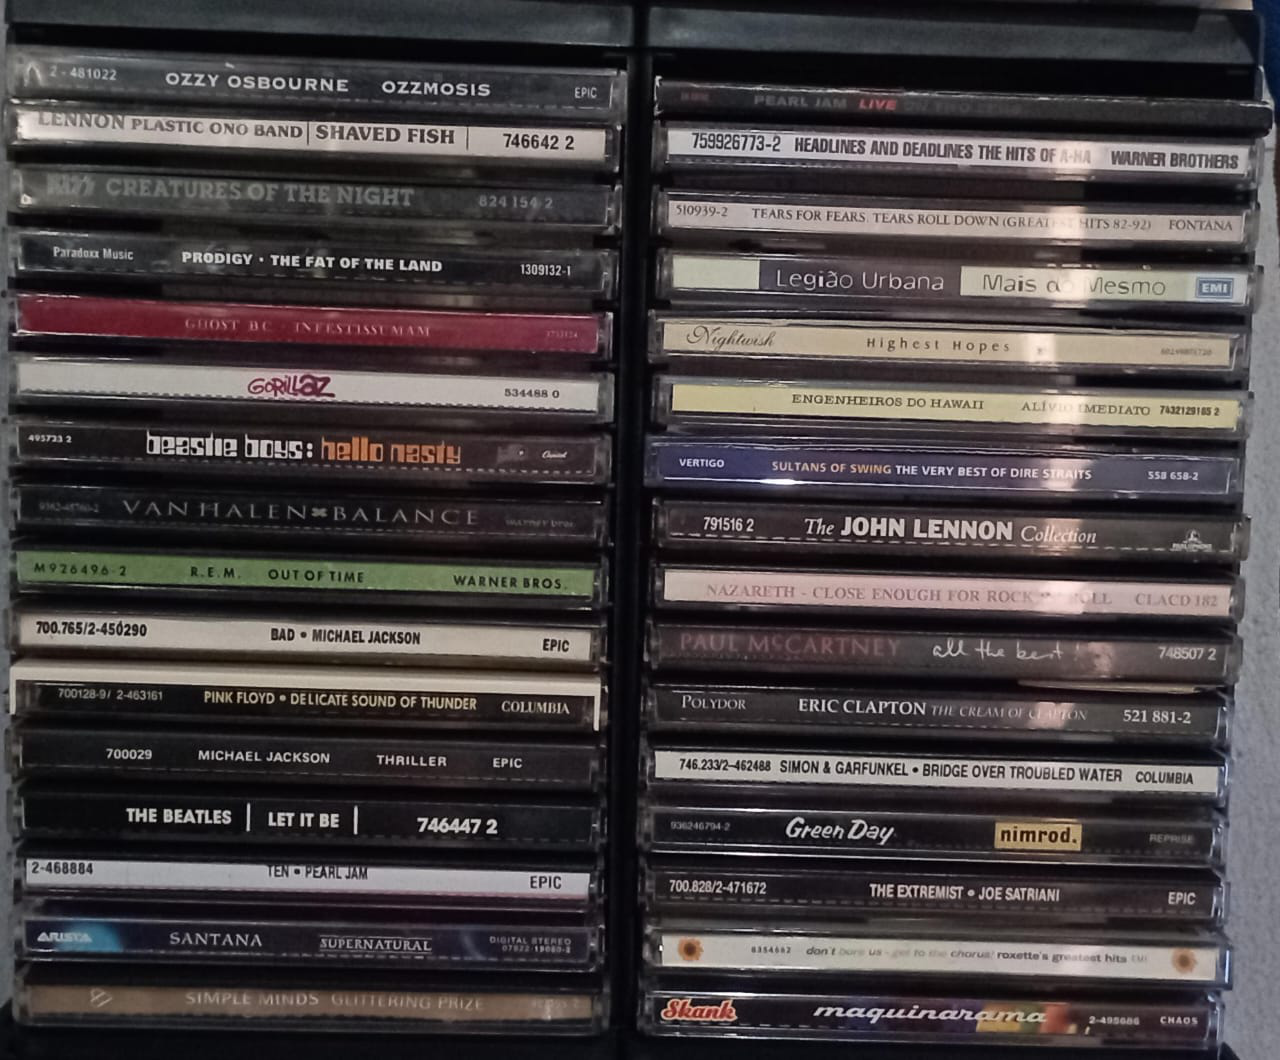

In [18]:
path_imagem = "./Data/cds.jpeg"
imagem = carrega_imagem(path_imagem)
imagem

<h1 style="color:blue; font-size:35px;">1ª Parte: Utilizando o modelo gemini-pro-vision: </h1>
<p>A partir da imagem, o Gemini identifica o nome dos Artistas e nome dos Álbums, gerando uma string no formato nome do artista1 - nome do album1 \n nome do artista2 - nome do Album2... </p>

In [20]:
prompt = "Quais são os 30 cds na foto?  responda da seguinte forma: nome do artista - nome do álbum, nome do artista 2 - nome do album 2, nome do artista 3 - nome do album 3, ..."
lista_artistas_albuns = pro_vision_genai(imagem, prompt)
lista_artistas_albuns

' Ozzy Osbourne - Ozzmosis\nLennon Plastic Ono Band - Shaved Fish\nCreatures of the Night\nProdigy - The Fat of the Land\nGhost BC - Infestissumam\nGorillaz\nBeastie Boys - Hello Nasty!\nVan Halen - Balance\nR.E.M. - Out of Time\nBad - Michael Jackson\nPearl Jam - Live\nThe Headless and the Deadlines the Hits of AHA\nTears for Fears - Tears Roll Down/Greatest Hits 82-92\nLegião Urbana - Mais do Mesmo\nNightrush - Highest Hopes\nEngenheiros do Hawaii - Alívio Imediato\nSultans of Swing the Very Best of Dire Straits\nThe John Lennon Collection\nPaul McCartney - All the Best\nEric Clapton - The Cream of Clapton\nPink Floyd - Delicate Sound of Thunder\nMichael Jackson - Thriller\nThe Beatles - Let it Be\nTen - Pearl Jam\nSantana - Supernatural\nSimple Minds - Glittering Prize\nGreen Day - Nimrod\nThe Extremist - Joe Satriani\nSkank - Maquinarama'

<h1 style="color:blue; font-size:35px;">2ª Parte: Utilizando o modelo gemini-1.5-pro-latest: </h1>
<p>Com o resultado do modelo anterior, e tendo a lista dos nomes dos artistas e álbuns, utiliza-se  a técnica de few-shot prompting, para que a resposta seja no formato próximo de um dicionário: <br>{'artist': 'nome_do_artista', 'album': 'nome_do_album', 'genre': [genero1, genero2],  'release_date': 'data_de_lançamento (DD MONTH YYYY)', 'label': 'nome_da_gravadora', 'tracks': número_de_faixas}, utilizando um exemplo de Pergunta e Resposta no prompt. </p>
<p>Como o output da função é uma string, utiliza-se a função eval() para transformar a string em dicionário, para carregar como DataFrame no pandas.</p>

In [22]:
prompt_2 = "Pergunta: Informações sobre Bob Dylan - Down In The Groove, Anitta - Bang!. Resposta: {'artist': 'Bob Dylan', 'album': 'Down In The Groove', 'genre': ['Rock', 'Blues', 'Folk'],  'release_date': '30 de maio de 1988', 'label': 'Columbia Records', 'tracks': 10}, {'artist': 'Anitta', 'album': 'Bang!', 'genre': ['Pop', 'Funk carioca'], 'release_date': '2015-10-09', 'label': 'Warner Music Brasil', 'tracks': 15} Pergunta: Informações sobre " + lista_artistas_albuns + ". Resposta:"
informacoes = pro_genai(prompt_2)
dictionary = eval(informacoes)
dictionary

({'artist': 'Ozzy Osbourne',
  'album': 'Ozzmosis',
  'genre': ['Heavy metal', 'Hard rock'],
  'release_date': '23 de outubro de 1995',
  'label': 'Epic Records',
  'tracks': 10},
 {'artist': 'John Lennon',
  'album': 'Shaved Fish',
  'genre': ['Rock', 'Pop rock'],
  'release_date': '24 de outubro de 1975',
  'label': 'Apple Records',
  'tracks': 12},
 {'artist': 'Kiss',
  'album': 'Creatures of the Night',
  'genre': ['Hard rock', 'Heavy metal'],
  'release_date': '13 de outubro de 1982',
  'label': 'Casablanca Records',
  'tracks': 9},
 {'artist': 'The Prodigy',
  'album': 'The Fat of the Land',
  'genre': ['Big beat', 'Electronic rock'],
  'release_date': '30 de junho de 1997',
  'label': 'XL Recordings',
  'tracks': 10},
 {'artist': 'Ghost B.C.',
  'album': 'Infestissumam',
  'genre': ['Heavy metal', 'Doom metal'],
  'release_date': '10 de abril de 2013',
  'label': 'Loma Vista Recordings',
  'tracks': 10},
 {'artist': 'Gorillaz',
  'album': 'Gorillaz',
  'genre': ['Alternative roc

<h1 style="color:blue; font-size:35px;">3ª Parte: Criação do DataFrame do dicionário com as informações, utilizando pandas: </h1>

In [24]:
acervo = pd.DataFrame(dictionary)
acervo.to_csv("minha_estante.csv")

In [25]:
acervo

,artist,album,genre,release_date,label,tracks
0,Ozzy Osbourne,Ozzmosis,"[Heavy metal, Hard rock]",23 de outubro de 1995,Epic Records,10
1,John Lennon,Shaved Fish,"[Rock, Pop rock]",24 de outubro de 1975,Apple Records,12
2,Kiss,Creatures of the Night,"[Hard rock, Heavy metal]",13 de outubro de 1982,Casablanca Records,9
3,The Prodigy,The Fat of the Land,"[Big beat, Electronic rock]",30 de junho de 1997,XL Recordings,10
4,Ghost B.C.,Infestissumam,"[Heavy metal, Doom metal]",10 de abril de 2013,Loma Vista Recordings,10
5,Gorillaz,Gorillaz,"[Alternative rock, Trip hop]",26 de março de 2001,Parlophone,15
6,Beastie Boys,Hello Nasty,"[Hip hop, Alternative rock]",14 de julho de 1998,Capitol Records,22
7,Van Halen,Balance,"[Hard rock, Heavy metal]",24 de janeiro de 1995,Warner Bros. Records,13
8,R.E.M.,Out of Time,[Alternative rock],12 de março de 1991,Warner Bros. Records,11
9,Michael Jackson,Bad,"[Pop, R&B, Funk, Rock]",31 de agosto de 1987,Epic Records,11


<h2 style="color:blue; font-size:20px;">Conclusão: O modelo conseguiu identificar 29 dos 30 cds da foto e todas as informações estão corretas, somente o penúltimo cd da pilha da direita não foi identificado e o texto com o nome colorido e com uma letra pequena pode ter sido o motivo de não ter sido detectado pelo modelo pro-vision.</h2>